$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Cross-validation scores: [0.1978022  0.13186813 0.17582418 0.17582418 0.12222222]
Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9
           8       0.38      0.20      0.26        15
           9       0.20      0.21      0.21        14
          10       0.15      0.23      0.18        26
          11       0.18      0.52      0.27        27
          12       0.11      0.17      0.13        23
          13       0.09      0.04      0.06        24
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         9
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1

    accuracy                 

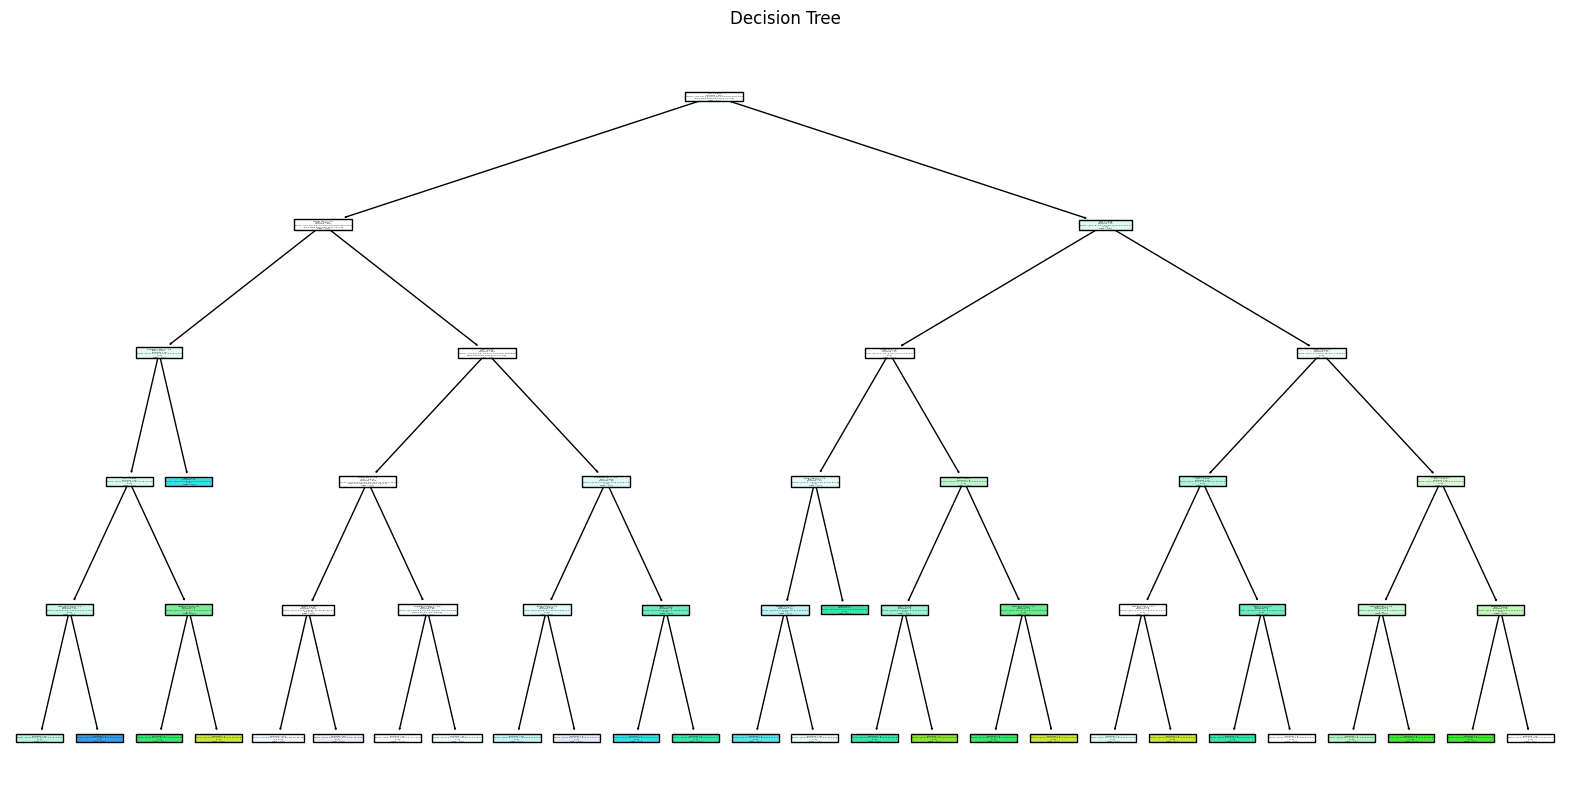

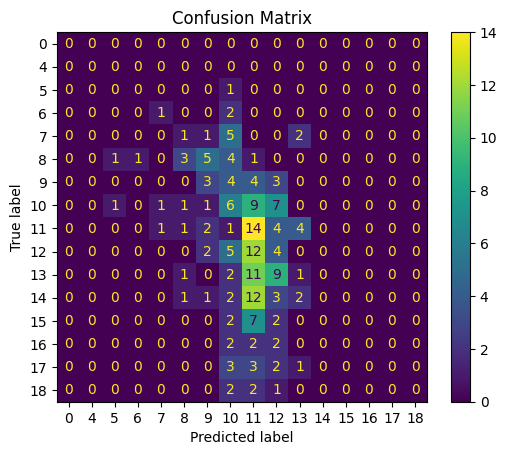

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

# Convert features and target variables to DataFrames
X_df = pd.DataFrame(X, columns=student_performance.variables.name[:-3])  # Exclude target variables G1, G2, G3
y_df = pd.DataFrame(y, columns=['G1', 'G2', 'G3'])

# Concatenate features and target variables along columns axis
df = pd.concat([X_df, y_df], axis=1)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['G1', 'G2', 'G3']), df['G1'], test_size=0.3, random_state=42)

# Step 2: Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Step 3: Build a Decision Tree Model with controlled depth
model = DecisionTreeClassifier(max_depth=5)  # Limiting the depth of the tree
model.fit(X_train_encoded, y_train)

# Using cross-validation to evaluate model
scores = cross_val_score(model, X_train_encoded, y_train, cv=5)
print("Cross-validation scores:", scores)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust size to your preference
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Visualize Confusion Matrix for the target variable
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
